In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train11=pd.read_csv('train.csv')
train=pd.read_csv('train.csv')

In [4]:
test11=pd.read_csv('test.csv')
test=pd.read_csv('test.csv')

In [5]:
for data in [train,test]:
    data['Title']=data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [7]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Countess      1
Sir           1
Capt          1
Lady          1
Mme           1
Jonkheer      1
Ms            1
Name: Title, dtype: int64

In [8]:
mapping={'Mr':2,'Mrs':3,'Miss':0,'Master':1,'Dr':1,'Rev':1,'Col':1,'Major':1,'Mlle':1,'Sir':1,'Ms':1,'Capt':1,'Jonkheer':1,'Don':1,'Lady':1,'Mme':1,
'Countess':1}

In [9]:
for data in [train,test]:
    data['Title']=data['Title'].map(mapping)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [12]:
for data in [train,test]:
    data['Cabin'] = data['Cabin'].str[:1]

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [14]:
def bar_chart(columns):
    survived=train[train['Survived']==1][columns].value_counts()
    dead=train[train['Survived']==0][columns].value_counts()
    dt=pd.DataFrame([survived,dead])
    dt.index=['survived','dead']
    dt.plot(kind='bar',stacked=True,figsize=(10,5))

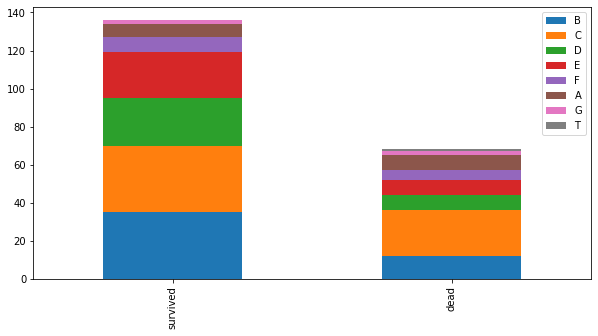

In [15]:
bar_chart('Cabin')

In [16]:
map_cabin={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}

In [17]:
for data in [train,test]:
    data['Cabin']=data['Cabin'].map(map_cabin)


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [19]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [20]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

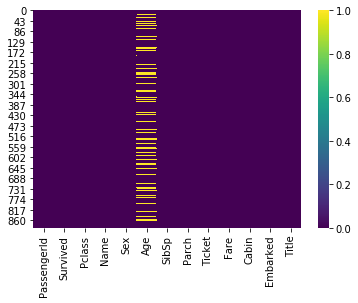

In [21]:
sns.heatmap(train.isnull(),cmap='viridis')

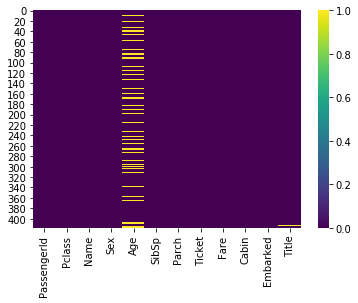

In [22]:
sns.heatmap(test.isnull(),cmap='viridis')

In [23]:
train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'),inplace=True)
test['Age'].fillna(test.groupby('Pclass')['Age'].transform('mean'),inplace=True)

In [24]:
train["Sex"]=pd.get_dummies(train["Sex"],drop_first=True)
test["Sex"]=pd.get_dummies(test["Sex"],drop_first=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2.0,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.8,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.8,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2.0,S,2


In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2.0,Q,2.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2.0,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2.0,Q,2.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2.0,S,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2.0,S,3.0


In [27]:
test['Title'].fillna(test[test['Pclass']==1]['Title'].median(),inplace=True)

In [28]:
test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
408,1300,3,"Riordan, Miss. Johanna Hannah""""",0,24.027945,0,0,334915,7.7208,2.0,Q,0.0
409,1301,3,"Peacock, Miss. Treasteall",0,3.000000,1,1,SOTON/O.Q. 3101315,13.7750,2.0,S,0.0
410,1302,3,"Naughton, Miss. Hannah",0,24.027945,0,0,365237,7.7500,2.0,Q,0.0
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.000000,1,0,19928,90.0000,0.8,Q,3.0
412,1304,3,"Henriksson, Miss. Jenny Lovisa",0,28.000000,0,0,347086,7.7750,2.0,S,0.0
413,1305,3,"Spector, Mr. Woolf",1,24.027945,0,0,A.5. 3236,8.0500,2.0,S,2.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,0.8,C,2.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,2.0,S,2.0
416,1308,3,"Ware, Mr. Frederick",1,24.027945,0,0,359309,8.0500,2.0,S,2.0
417,1309,3,"Peter, Master. Michael J",1,24.027945,1,1,2668,22.3583,2.0,C,1.0


In [29]:
test['Fare'].fillna(test[test['Pclass']==3]['Fare'].median(),inplace=True)

In [30]:
test['Fare'][152]

7.8958

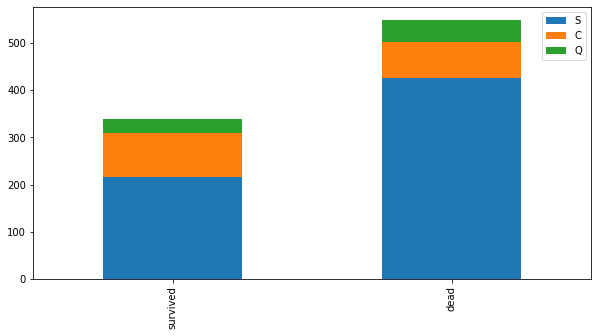

In [31]:
bar_chart("Embarked")

In [32]:
train['Embarked'].fillna('S',inplace=True)
test["Embarked"].fillna("S",inplace=True)

In [33]:
train["Fare"].isnull().value_counts()

False    891
Name: Fare, dtype: int64

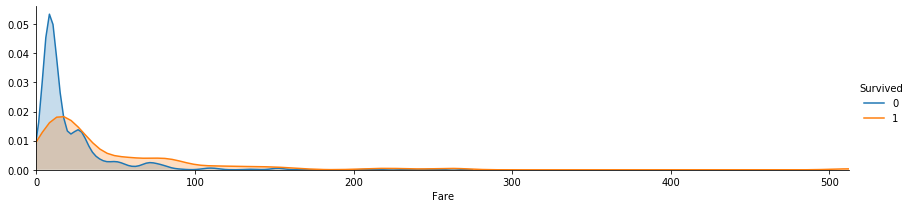

In [34]:
face=sns.FacetGrid(train,hue='Survived',aspect=4)
face.map(sns.kdeplot,'Fare',shade=True)
face.set(xlim=(0,train['Fare'].max()))
face.add_legend()
plt.show()

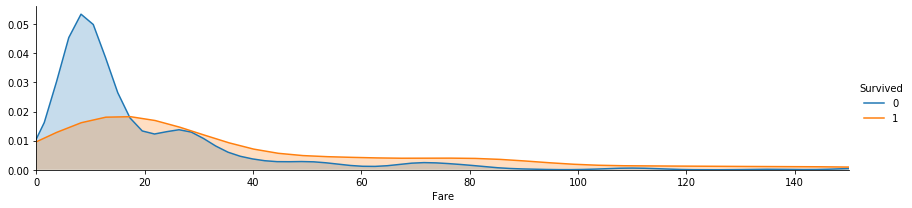

In [35]:
face=sns.FacetGrid(train,hue='Survived',aspect=4)
face.map(sns.kdeplot,'Fare',shade=True)
face.set(xlim=(0,150))
face.add_legend()
plt.show()

In [36]:
def map_fare(col):
    if col<17:
        return 0
    elif col>17 and col<35:
        return 1
    elif col>35 and col<110:
        return 2
    else:
        return 3

In [37]:
train['Fare']=train['Fare'].apply(map_fare)
test['Fare']=test['Fare'].apply(map_fare)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0,2.0,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,2,0.8,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0,2.0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,2,0.8,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0,2.0,S,2


In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,0,2.0,Q,2.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,0,2.0,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,0,2.0,Q,2.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,0,2.0,S,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,0,2.0,S,3.0


In [40]:
def map_embarked(col):
    if col=='S':
        return 0
    elif col=='C':
        return 1
    else:
        return 3

In [41]:
train['Embarked']=train['Embarked'].apply(map_embarked)
test['Embarked']=test['Embarked'].apply(map_embarked)

In [42]:
train['Embarked']=train11['Embarked']
test['Embarked']=test11['Embarked']

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0,2.0,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,2,0.8,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0,2.0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,2,0.8,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0,2.0,S,2


In [44]:
map_embark={'S':0,'C':1,'Q':2}
for data in [train,test]:
    data['Embarked']=data['Embarked'].map(map_embark)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0,2.0,0.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,2,0.8,1.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0,2.0,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,2,0.8,0.0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0,2.0,0.0,2


In [46]:
for data in [train,test]:
    data['Family']=data['SibSp']+data['Parch']+1

In [47]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,0,2.0,2,2.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,0,2.0,0,3.0,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,0,2.0,2,2.0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,0,2.0,0,2.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,0,2.0,0,3.0,3


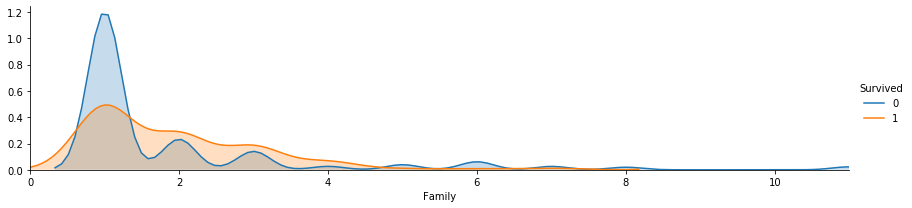

In [48]:
face=sns.FacetGrid(train,hue='Survived',aspect=4)
face.map(sns.kdeplot,'Family',shade=True)
face.set(xlim=(0,train['Family'].max()))
face.add_legend()
plt.show()


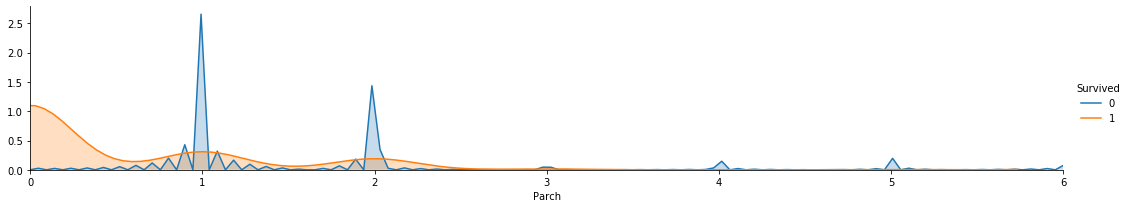

In [49]:
face=sns.FacetGrid(train,hue='Survived',aspect=5)
face.map(sns.kdeplot,'Parch',shade=True)
face.set(xlim=(0,train['Parch'].max()))
face.add_legend()
plt.show()

In [50]:
map_family= {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for data in [train,test]:
    data['Family'] = data['Family'].map(map_family)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0,2.0,0.0,2,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,2,0.8,1.0,3,0.4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0,2.0,0.0,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,2,0.8,0.0,3,0.4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0,2.0,0.0,2,0.0


In [52]:
train.drop(['SibSp','Parch','Name'],inplace=True,axis=1)

In [53]:
test.drop(['SibSp','Parch','Name'],inplace=True,axis=1)

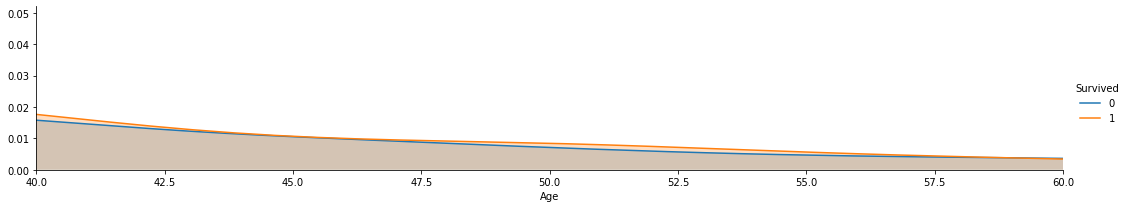

In [54]:
face=sns.FacetGrid(train,hue='Survived',aspect=5)
face.map(sns.kdeplot,'Age',shade=True)
face.set(xlim=(40,60))
face.add_legend()
plt.show()

In [55]:
def map_age(col):
    if col<16:
        return 0
    elif col>16 and col<32:
        return 1
    elif col>32 and col<45:
        return 2
    else:
        return 3

In [56]:
train['Age']=train['Age'].apply(map_age)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,1,1,A/5 21171,0,2.0,0.0,2,0.4
1,2,1,1,0,2,PC 17599,2,0.8,1.0,3,0.4
2,3,1,3,0,1,STON/O2. 3101282,0,2.0,0.0,0,0.0
3,4,1,1,0,2,113803,2,0.8,0.0,3,0.4
4,5,0,3,1,2,373450,0,2.0,0.0,2,0.0


In [58]:
test['Age']=test['Age'].apply(map_age)

In [59]:
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family
0,892,3,1,2,330911,0,2.0,2,2.0,0.0
1,893,3,0,3,363272,0,2.0,0,3.0,0.4
2,894,2,1,3,240276,0,2.0,2,2.0,0.0
3,895,3,1,1,315154,0,2.0,0,2.0,0.0
4,896,3,0,1,3101298,0,2.0,0,3.0,0.8


In [60]:
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [61]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,892,3,1,2,0,2.0,2,2.0,0.0
1,893,3,0,3,0,2.0,0,3.0,0.4
2,894,2,1,3,0,2.0,2,2.0,0.0
3,895,3,1,1,0,2.0,0,2.0,0.0
4,896,3,0,1,0,2.0,0,3.0,0.8


In [62]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,1,0,3,1,1,0,2.0,0.0,2,0.4
1,2,1,1,0,2,2,0.8,1.0,3,0.4
2,3,1,3,0,1,0,2.0,0.0,0,0.0
3,4,1,1,0,2,2,0.8,0.0,3,0.4
4,5,0,3,1,2,0,2.0,0.0,2,0.0


In [63]:
train.drop('PassengerId',axis=1,inplace=True)

In [109]:
train['Embarked'][829]

True

In [209]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,1,1,0,2.0,0,2,0.4
1,1,1,0,2,2,0.8,1,3,0.4
2,1,3,0,1,0,2.0,0,0,0.0
3,1,1,0,2,2,0.8,0,3,0.4
4,0,3,1,2,0,2.0,0,2,0.0


In [219]:
X=train.drop('Survived',axis=1)
y=train['Survived']


In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null uint8
Age         891 non-null int64
Fare        891 non-null int64
Cabin       891 non-null float64
Embarked    891 non-null int64
Title       891 non-null int64
Family      891 non-null float64
dtypes: float64(2), int64(6), uint8(1)
memory usage: 56.7 KB


In [233]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,3,1,1,0,2.0,0,2,0.4
1,1,0,2,2,0.8,1,3,0.4
2,3,0,1,0,2.0,0,0,0.0
3,1,0,2,2,0.8,0,3,0.4
4,3,1,2,0,2.0,0,2,0.0


In [235]:
test_data=test.drop('PassengerId',axis=1)

In [236]:
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,3,1,2,0,2.0,2,2.0,0.0
1,3,0,3,0,2.0,0,3.0,0.4
2,2,1,3,0,2.0,2,2.0,0.0
3,3,1,1,0,2.0,0,2.0,0.0
4,3,0,1,0,2.0,0,3.0,0.8


In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
logmodel=LogisticRegression()

In [119]:
logmodel.fit(X_train,y_train)

C:\Users\SHAKYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
log_pre=logmodel.predict(X_test)

In [237]:
log_test_pre=logmodel.predict(test_data)

In [238]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':log_test_pre}).set_index('PassengerId').to_csv('log210.csv')

In [121]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(y_test,log_pre))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.64      0.71       114

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [ ]:
#KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn=KNeighborsClassifier(n_neighbors=1)

In [125]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [126]:
error_rate=[]

for i in range(1,40):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

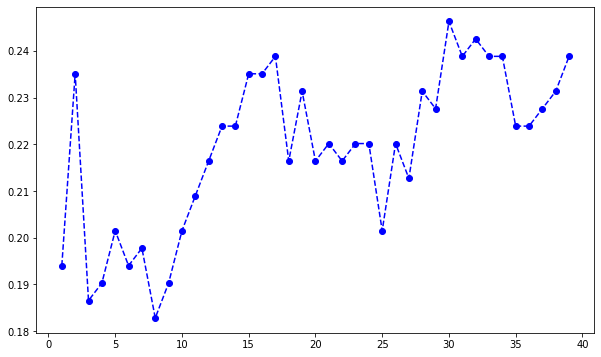

In [127]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='dashed',marker='o')

In [132]:
knn=KNeighborsClassifier(n_neighbors=8)

In [133]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [134]:
knn_pre=knn.predict(X_test)

In [239]:
knn_test_pre=knn.predict(test_data)

In [240]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':knn_test_pre}).set_index('PassengerId').to_csv('knn211.csv')

In [135]:
print(classification_report(y_test,knn_pre))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       154
           1       0.91      0.63      0.75       114

    accuracy                           0.82       268
   macro avg       0.84      0.79      0.80       268
weighted avg       0.83      0.82      0.81       268



In [136]:
###Random forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
Ran_model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [139]:
Ran_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [146]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
ran_grid={'n_estimators':[100,300,500,800,1200],
          'criterion':['gini','entropy'],
          'max_depth':[5, 8, 15, 25, 30],
          'min_samples_leaf':[1,2,5,12],
         'min_samples_split':[2,5,10,15,100],
         'bootstrap':[True,False]}

In [148]:
rscv=RandomizedSearchCV(Ran_model,ran_grid,n_jobs=-1,n_iter=40,cv=9)

In [149]:
rscv.fit(X_train,y_train)

C:\Users\SHAKYA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=9, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,

In [150]:
rscv.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 30,
 'criterion': 'entropy',
 'bootstrap': True}

In [151]:
rscv.best_score_

0.8330658105939005

In [152]:
Ran_model=RandomForestClassifier(n_estimators=800,criterion='entropy',min_samples_split=10,min_samples_leaf=1,max_depth=30,
                                 bootstrap=True,random_state=0)

In [153]:
Ran_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [154]:
rfc_pre=Ran_model.predict(X_test)

In [155]:
print(classification_report(y_test,rfc_pre))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       154
           1       0.90      0.62      0.74       114

    accuracy                           0.81       268
   macro avg       0.84      0.79      0.79       268
weighted avg       0.83      0.81      0.80       268



In [242]:
rfc_test_pre=Ran_model.predict(test_data)

In [243]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':rfc_test_pre}).set_index('PassengerId').to_csv('rfc212.csv')

In [156]:
###Naive Bayes

In [157]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [158]:
gnb_pre=GNB.predict(X_test)

In [159]:
print(classification_report(y_test,gnb_pre))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       154
           1       0.69      0.76      0.72       114

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.75      0.75       268



In [160]:
from sklearn.svm import SVC
svc=SVC()
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
             ]


In [162]:
gridsearch=GridSearchCV(estimator=svc,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)

In [164]:
gridsearch.fit(X_train,y_train)

C:\Users\SHAKYA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [165]:
gridsearch.best_params_

{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}

In [166]:
gridsearch.best_score_

0.8378812199036918

In [168]:
svc=SVC(C=1,kernel='rbf',gamma=0.3)

In [169]:
svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [170]:
svc_pre=svc.predict(X_test)

In [171]:
print(classification_report(y_test,svc_pre))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       154
           1       0.86      0.63      0.73       114

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.78       268
weighted avg       0.81      0.80      0.79       268



In [244]:
svc_test_pre=svc.predict(test_data)

In [245]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':svc_test_pre}).set_index('PassengerId').to_csv('svc213.csv')

In [173]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()

In [174]:
optimization_dict = {'max_depth': [2,4,6,10],
                     'n_estimators': [50,100,200,300,1000,3000],
                    'learning_rate':[0.001,0.01,0.05,0.1],
                    'gamma':[0,0.1,0.5,1]}

In [180]:
xgbsearch=GridSearchCV(xgb,optimization_dict,scoring='accuracy',verbose=1)

In [224]:
print(X_train.dtypes)

Pclass        int64
Sex           uint8
Age           int64
Fare          int64
Cabin       float64
Embarked      int64
Title         int64
Family      float64
dtype: object


In [190]:
train['Embarked']=train11['Embarked']

In [204]:
train['Embarked']=train['Embarked'].apply(map_embarked)

In [205]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,1,1,0,2.0,0,2,0.4
1,1,1,0,2,2,0.8,1,3,0.4
2,1,3,0,1,0,2.0,0,0,0.0
3,1,1,0,2,2,0.8,0,3,0.4
4,0,3,1,2,0,2.0,0,2,0.0


In [207]:
np.where(np.isnan(train))

(array([], dtype=int64), array([], dtype=int64))

In [225]:
xgbsearch.fit(X_train,y_train)

C:\Users\SHAKYA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed: 15.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'gamma': [0, 0.1, 0.5, 1],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [2, 

In [226]:
xgbsearch.best_params_

{'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

In [229]:
xgbsearch.best_score_

0.8346709470304976

In [227]:
xgb=XGBClassifier(gamma=0.5,learning_rate=0.01,max_depth=10,n_estimators=200)

In [230]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [231]:
xgb_pre=xgb.predict(X_test)

In [232]:
print(classification_report(y_test,xgb_pre))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       154
           1       0.86      0.64      0.73       114

    accuracy                           0.80       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



In [246]:
xgb_test_pre=xgb.predict(test_data)

In [247]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':xgb_test_pre}).set_index('PassengerId').to_csv('xgb214.csv')